# Audio Pre-Processing

### Importing Required Libraries

In [1]:
import numpy as np # Numeric library for Python
import librosa # Audio processing Library
#import random # Generate random distributions
from scipy.io import wavfile #Read and write wav files
import matplotlib.pyplot as plt # Plot spectrograms
#import math #Basic math
import IPython.display as ipd #For listening to audio
import glob
import os
import tqdm

### File locations

In [2]:
Audio_Male = "Audio/train/kn_in_male/"
Audio_Female = "Audio/train/kn_in_female/"

In [3]:
Audio_Male_list = glob.glob(Audio_Male+"*")
Audio_Female_list = glob.glob(Audio_Female+"*")

In [4]:
print(len(Audio_Male_list),len(Audio_Female_list))

2152 2051


### Defining required functions

In [5]:
def ReadData(fileLocation):
    
    samplingFrequency, signalData = wavfile.read(fileLocation)
    
    return(signalData,samplingFrequency)

In [22]:
def WriteData(fileLocation,signalData,samplingFrequency):
        
    wavfile.write(fileLocation, samplingFrequency, signalData)

In [7]:
def PlotSpectrum(data,freq,size = (16,8)):
    plt.figure(figsize = size)
    n_plots = len(data)
    for i in range(len(data)):
        plt.subplot(n_plots,2,2*i+1)
        plt.plot(data[i])
        plt.subplot(n_plots,2,2*i+2)
        plt.specgram(data[i],Fs=freq)
    plt.show()   

In [8]:
def Listen(signal,freq):
    n_signals = len(signal)
    
    for i in range(n_signals):
        ipd.display(ipd.Audio(signal[i], rate=freq))


In [9]:
def PitchShift(data,freq,steps):
    
    shiftedData = librosa.effects.pitch_shift(data, freq, steps, bins_per_octave=12)
    
    return(shiftedData)

In [10]:
def Noisify(signal,freq,snr=-1):
        
    if(snr == -1):
        snr = 1.5+np.random.random()  #between 1.5 and 2.5
        
    rms_input=np.sqrt(np.mean(signal**2))
    
    rms_noise=np.sqrt((rms_input**2)/(pow(10,snr/10))) #rms noise = standard deviation of noise
    noise=np.random.normal(0,rms_noise,signal.shape[0]) #number of data points
    
    noisy_signal=signal+noise 
    
    return noisy_signal

In [11]:
def TimeDilation(signal,stretch):
    
    stretched = librosa.effects.time_stretch(signal, stretch)
    
    return(stretched)

In [12]:
# def PhaseVocoder(signal,rate):
    
#     stft = librosa.stft(signal, 512)
#     shiftedStft = librosa.phase_vocoder(stft,rate)
#     signal = librosa.istft(shiftedStft)
    
#     return(signal)

# rate = 0.65
# vocoded = PhaseVocoder(data,rate)
# PlotSpectrum([data,vocoded,dialated],freq)
# Listen([data,vocoded,dialated],freq)

### Main Code

In [13]:
os.makedirs("Audio_Pitch/train/kn_in_male/",exist_ok=True)
os.makedirs("Audio_Pitch/train/kn_in_female/",exist_ok=True)
os.makedirs("Audio_Noise/train/kn_in_male/",exist_ok=True)
os.makedirs("Audio_Noise/train/kn_in_female/",exist_ok=True)
os.makedirs("Audio_Dilate/train/kn_in_male/",exist_ok=True)
os.makedirs("Audio_Dilate/train/kn_in_female/",exist_ok=True)

In [14]:
# Pitch shifting data
Audio_list = Audio_Male_list + Audio_Female_list
Audio_list_Pitch = [i.replace('Audio','Audio_Pitch') for i in Audio_list]
Audio_list_Noise = [i.replace('Audio','Audio_Noise') for i in Audio_list]
Audio_list_Dilate = [i.replace('Audio','Audio_Dilate') for i in Audio_list]

In [24]:
n_steps=3


for i,file in enumerate(tqdm.tqdm(Audio_list)):
    data , freq = ReadData(file)
    data = data.astype('f')
    
    shiftedData = PitchShift(data,freq,n_steps)
    shiftedData = shiftedData.astype(np.int16)
    WriteData(Audio_list_Pitch[i],shiftedData,freq)
    
    noisySignal = Noisify(data,freq)
    noisySignal = noisySignal.astype(np.int16)
    WriteData(Audio_list_Noise[i],noisySignal,freq)
    
    outputRate = 0.65 + 0.2*np.random.random() # for dialation rate : 0.65-0.85
    dialated = TimeDilation(data,outputRate)
    dialated = dialated.astype(np.int16)
    WriteData(Audio_list_Dilate[i],dialated,freq)

100%|██████████| 4203/4203 [1:21:37<00:00,  1.17s/it]


### Testing functions

In [20]:
test_File = Audio_Female + "knf_00001_00413020320.wav"
data , freq = ReadData(test_File)
data = data.astype('f')

------------------ Shifting Pitch ------------------


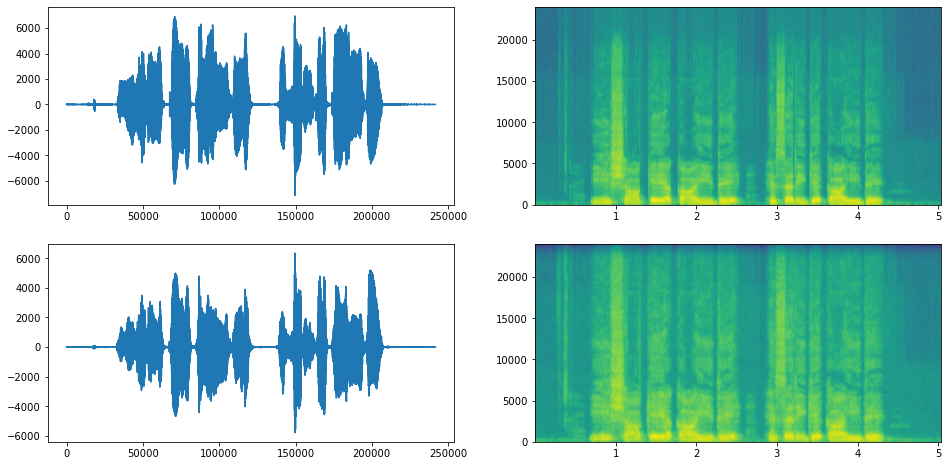

In [21]:
print("------------------ Shifting Pitch ------------------")
n_steps=3
shiftedData = PitchShift(data,freq,n_steps)
PlotSpectrum([data,shiftedData],freq)
Listen([data,shiftedData],freq)

------------------ Adding Gaussian Noise ------------------


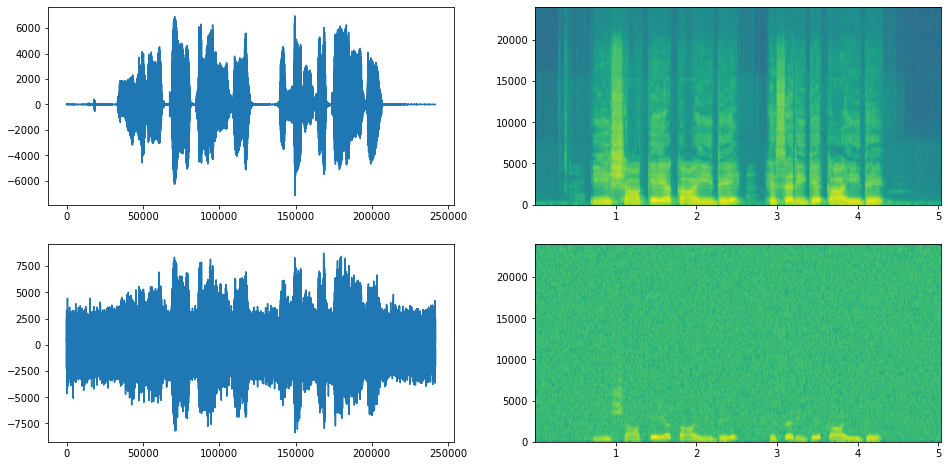

In [22]:
print("------------------ Adding Gaussian Noise ------------------")
noisySignal = Noisify(data,freq)
PlotSpectrum([data,noisySignal],freq)
Listen([data,noisySignal],freq)

------------------ Time Dialation ------------------


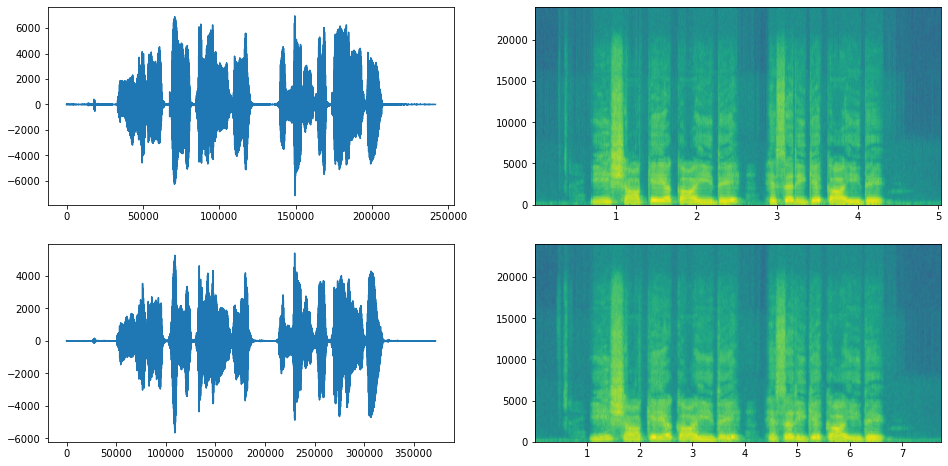

In [23]:
print("------------------ Time Dialation ------------------")
outputRate = 0.65
dialated = TimeDilation(data,outputRate)
PlotSpectrum([data,dialated],freq)
Listen([data,dialated],freq)